# P2 : Project Proposal and Initial Analyses

### **Import Librairies**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from preprocessing import *
from plot_functions import *
from utils import *

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Load Path**

In [5]:
# Data Path
DATA_FOLDER = 'Data/'
DATA_SAVE_FOLDER = 'Data_Processed/'

PLOT_DATASET = DATA_FOLDER+"plot_summaries.txt"
CHARACTER_DATASET = DATA_FOLDER+"character.metadata.tsv"
MOVIE_DATASET = DATA_FOLDER+"movie.metadata.tsv"

# Test dataset in the original study
NAME_DATASET = DATA_FOLDER+"name.clusters.txt"
TVTROPES_DATASET = DATA_FOLDER+"tvtropes.clusters.txt"

### **Inital Data Loading**

### **1.1 Read the Movie Metadata Dataset**

In [6]:
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie name",
    "Movie release date",
    "Movie box office revenue",
    "Movie runtime",
    "Movie languages",
    "Movie countries",
    "Movie genres"
]
df_movie = pd.read_csv(MOVIE_DATASET, sep='\t', header=None, names=column_names)

df_movie.head(5)


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


>Il va falloir gerer les NAN values et le dictionnaires des movies languages, countries et genres

### **1.2 Data cleaning of Movie Metadata Dataset**

> df_movie = process_movie_data(df_movie)

In [7]:
save_path = DATA_SAVE_FOLDER + "df_process.csv"
""" df_movie = process_movie_data(df_movie, save_path) """

' df_movie = process_movie_data(df_movie, save_path) '

In [8]:
# Read the CSV file into a DataFrame
df_movie = pd.read_csv(save_path)
df_movie.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True
1,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Science Fiction,2001.0,8.0,24.0,True
2,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Horror,2001.0,8.0,24.0,True
3,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Adventure,2001.0,8.0,24.0,True
4,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Supernatural,2001.0,8.0,24.0,True


### **2. Exploration of the Data**

#### **2.1 Repartition of the Release Date**

In [47]:
# Use the `drop_duplicates()` method to keep a single row per movie based on the movie name.
df_unique_movies = df_movie.drop_duplicates(subset=['Movie name'])
df_unique_movies.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True
7,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,English,United States of America,Mystery,2000.0,2.0,16.0,True
11,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,Norwegian,Norway,Crime Fiction,1988.0,NaN,NaN,False
13,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,English,United Kingdom,Thriller,1987.0,NaN,NaN,False
16,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,German,Germany,Drama,1983.0,NaN,NaN,False


In this dataset, there are 36429 movies with missing release month out of a total of 75478 movies.
Mean Release Year (Month Available): 1977
Standard Deviation Release Year (Month Available): 31

Mean Release Year (Month Not Available): 1978
Standard Deviation Release Year (Month Not Available): 26


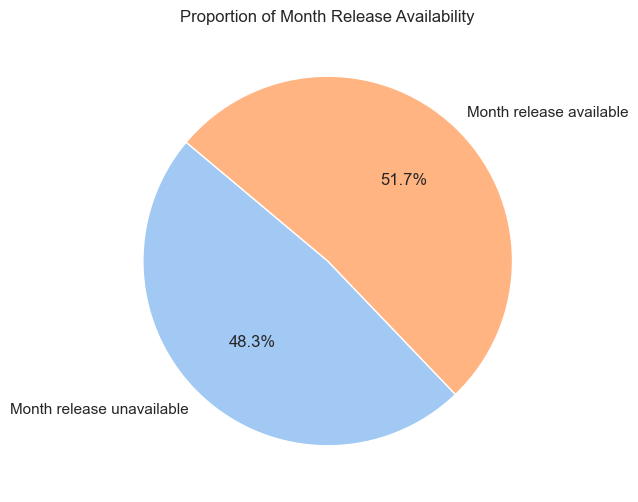

In [49]:
# Utilisez la fonction avec un DataFrame
plot_month_release_availability(df_unique_movies)

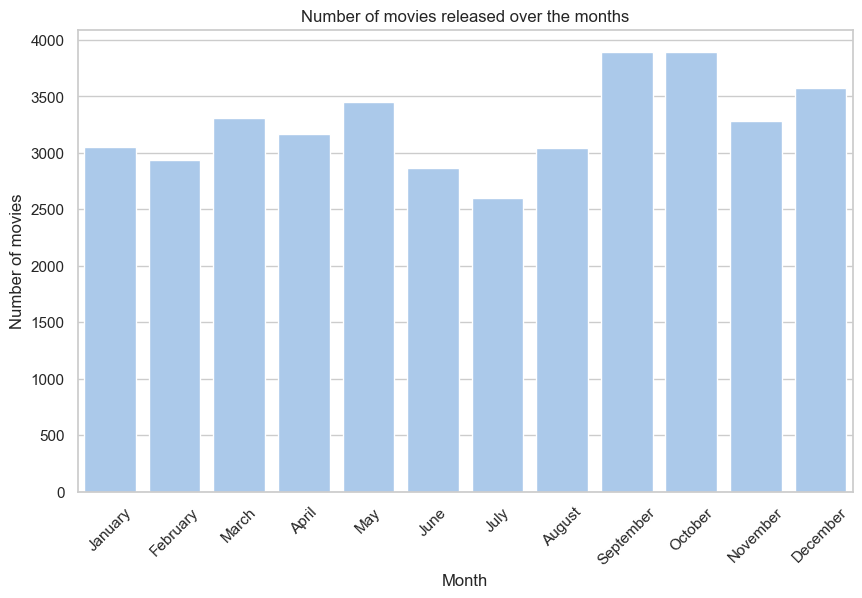

In [50]:
plot_monthly_movie_counts(df_unique_movies)

> Pouvons nous recuperer les mois ou le film a été release grace a son ID? 

#### **2.2 Exploration of the repartion of the Genre**

In [51]:
sorted_genre_counts = count_and_sort_movie_genres(df_movie)

In [52]:
# Select genres with more than 10000 movies in the dataset
selected_genres  = [genre for genre, count in sorted_genre_counts.items() if count > 10000]
# Select the top 5 genres
selected_genres = list(sorted_genre_counts.keys())[:5]
print("Number of genres selected: ", len(selected_genres))


Number of genres selected:  5


> Faire un commentaire sur quand choisir le nombre de genre sur lequel se restreindre 

#### **2.3 Analysis by genres**

In [53]:
# Filter movies by genres
df_filter = filter_movies_by_genres(df_movie, selected_genres)
df_filter.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True
5,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Action,2001.0,8.0,24.0,True
9,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,English,United States of America,Drama,2000.0,2.0,16.0,True
12,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,Norwegian,Norway,Drama,1988.0,NaN,NaN,False
13,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,English,United Kingdom,Thriller,1987.0,NaN,NaN,False


In this dataset, there are 22367 movies with missing release month out of a total of 51191 movies.
Mean Release Year (Month Available): 1978
Standard Deviation Release Year (Month Available): 31

Mean Release Year (Month Not Available): 1980
Standard Deviation Release Year (Month Not Available): 24


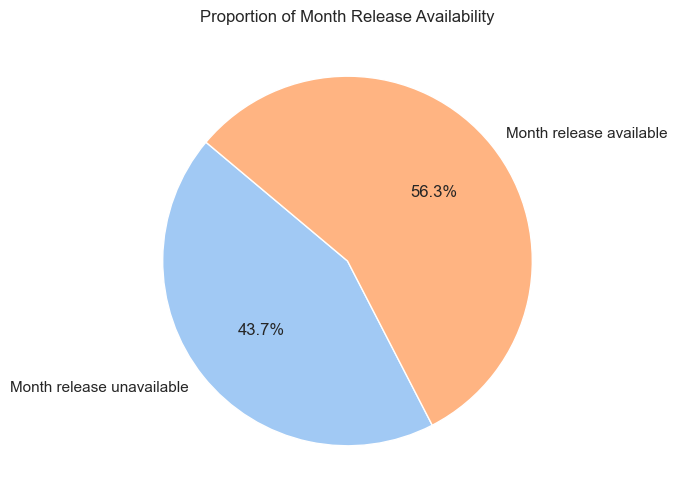

In [54]:
# Plot the availability of month date in the movies
plot_month_release_availability(df_filter)

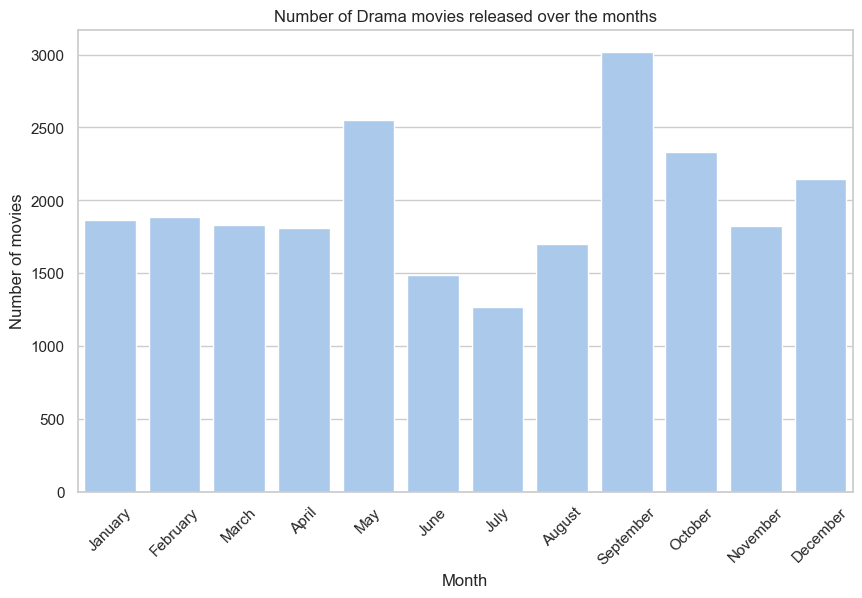

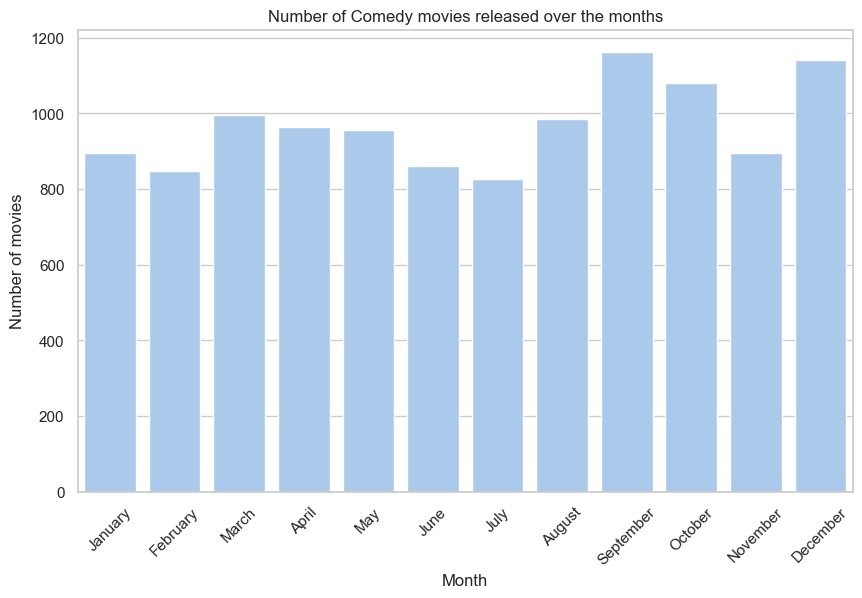

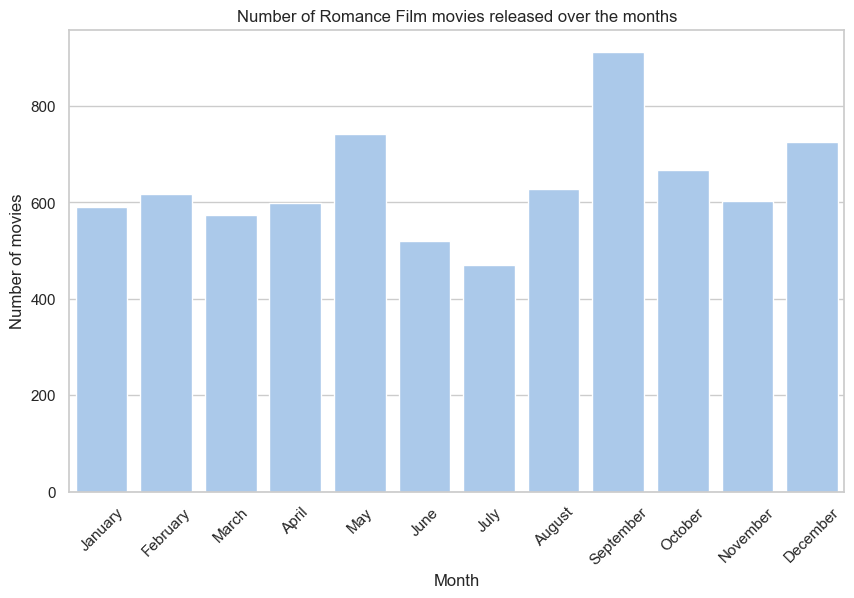

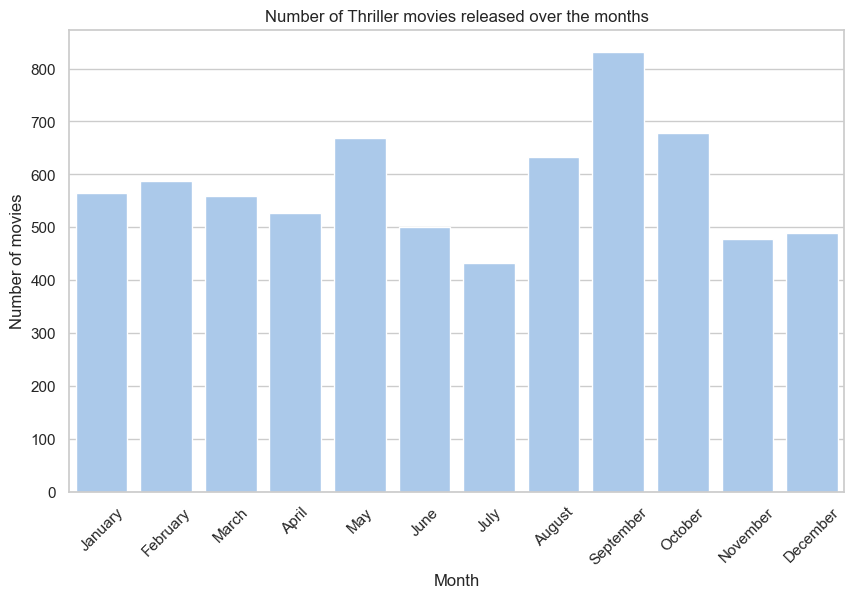

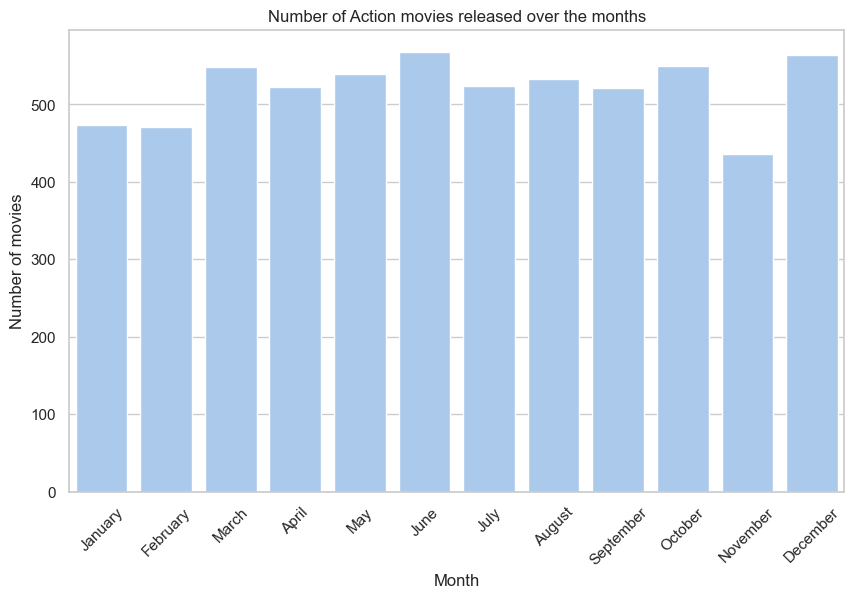

In [56]:
plot_monthly_movie_counts(df_movie, selected_genres)